In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

Design Spcae and Criterion Space for multi-objective optimization problem

In [ ]:
# define the objective functions and constraints
def f_1(x):
  return (x[0] - 2)**2 + (x[1] - 5)**2

def f_2(x):
  return (x[0] - 4.5)**2 + (x[1] - 8.5)**2

def g_1(x):
  return -x + 10

def g_2(x):
  return (2*x + 10)/3

In [ ]:
def plot_design(f_1, f_2, g_1, g_2):
  figure, axes = plt.subplots()
  figure.set_figheight(5)
  figure.set_figwidth(5)

  # plot g_1 and g_2
  x = np.linspace(0, 12, 100)
  y_1 = g_1(x)
  y_2 = g_2(x)
  plt.plot(x, y_1, label='g1', color='b')
  plt.plot(x, y_2, label='g2', color='g')

  contour = [0.5, 3.25, 5]
  for c in contour:
    f_1 = plt.Circle((2, 5), c, fill = False, label='f1= '+str(c), color='r')
    f_2 = plt.Circle((4.5, 8.5), c, fill = False, label='f2= '+str(c), color='k')

    axes.add_artist(f_1)
    axes.add_artist(f_2)

  plt.title("Design Space")
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.xlim(0, 12)
  plt.ylim(0, 12)
  plt.legend()
  plt.grid(True)
  plt.show()

  # return y_1, y_2

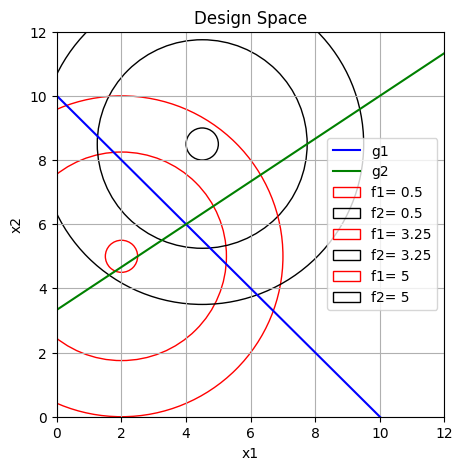

In [ ]:
plot_design(f_1, f_2, g_1, g_2)

Below cell will take 5 minutes to execute

In [ ]:
x = np.linspace(4, 12, 2*250+100)
lin = 1
x1 = []
y1 = []
for x in x:
    dum = np.empty(lin)
    dum.fill(x)
    # print(dum)

    x1 = np.append(x1, dum)
    y = np.linspace(g_1(x), g_2(x), lin)

    y1 = np.append(y1, y)
    lin = lin + 1

feasible_space = np.column_stack((x1, y1))
fk1 = []
fk2 = []
for i in feasible_space:
  fk1 = np.append(fk1, f_1(i))
  fk2 = np.append(fk2, f_2(i))
# plt.scatter(f1, f2, s=2)


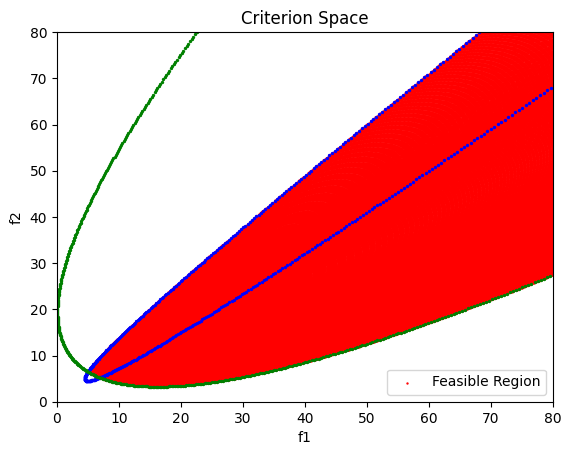

In [ ]:
x = np.linspace(-12, 12, 1000)
# x = np.linspace(0, 12, 100)


y_1 = g_1(x)
y_2 = g_2(x)

plt.scatter(fk1, fk2, s= 0.5, color='r', label='Feasible Region')

# print(x.shape, y_1.shape)
q1 = np.column_stack((x, y_1))
f1 = []
f2 = []
for i in q1:
  f1 = np.append(f1, f_1(i))
  f2 = np.append(f2, f_2(i))
plt.scatter(f1, f2, s=2, color='b')


q2 = np.column_stack((x, y_2))
f1 = []
f2 = []
for i in q2:
  f1 = np.append(f1, f_1(i))
  f2 = np.append(f2, f_2(i))
# print(feasible_space[0:1, :])
plt.scatter(f1, f2, s=2, color='g')
plt.title('Criterion Space')
plt.xlabel('f1')
plt.ylabel('f2')
plt.ylim(0, 80)
plt.xlim(0, 80)
plt.legend()
# print(f_1(feasible_space))

Algorithm for Pareto front generation

In [ ]:
def evalfcn(x):
    return np.array([f1(x), f2(x)])

In [ ]:
# def f1(x):
#     return x[0] - 3 * x[1] + 8

# def f2(x):
#     return x[0] + x[1] - 10

In [ ]:
# def f1(x):
#     return -(x[0]**2 + x[1])

# def f2(x):
#     return x[0] + x[1]**2


In [ ]:
def f1(x):
    return (x[0] - 2)**2 + (x[1] - 5)**2

def f2(x):
    return (x[0] - 4.5)**2 + (x[1] - 8.5)**2



In [ ]:
def candi_Pareto(feasible_space, num_points):
  num_dim = feasible_space.shape[0]
  idx = np.random.choice(feasible_space.shape[0], num_points)
  candi_points = np.array([feasible_space[idx[0], :]])

  for i in range(0,len(idx)):
    if (i != 0):
      candi_points = np.vstack((candi_points, feasible_space[idx[i], :]))

  return np.array(candi_points)

# def genxmat(POPSIZE):
#     xmat0 = np.random.rand(POPSIZE, 2)
#     print(xmat0)
#     xmat0[:, 0] = xmat0[:, 0] * 4 + 2
#     xmat0[:, 1] = xmat0[:, 1] * 4 + 5
#     return xmat0

In [ ]:
def select_P(xmat):
    J = xmat.shape[0]
    Rset = [0]
    j = 0
    isstep7 = 0
    x = [xmat[0, :]]
    f = [evalfcn(x[0])]
    for k in range(J):
        x.append(xmat[k, :])
        f.append(evalfcn(x[k + 1]))

    while j < J - 1:
        j += 1
        r = 0
        rdel = []
        q = 0
        R = len(Rset)


        while True:
            if all(f[j] < f[Rset[r]]):
                q += 1
                rdel.append(r)
            else:
                if all(f[j] >= f[Rset[r]]):
                    break
            r += 1
            if r > R - 1:
                isstep7 = 1
                break

        if isstep7 == 1:
            isstep7 = 0
            if q != 0:
                Rset = np.delete(Rset, rdel)
                Rset = np.append(Rset, j)
            else:
                Rset = np.append(Rset, j)

    xR = [x[i] for i in Rset]
    fR = [f[i] for i in Rset]

    return xR, fR

In [ ]:
def multi_op(POPSIZE, NUMITER):
    for i in range(1, NUMITER + 1):
        print(f'Iteration {i}...')
        xmat = candi_Pareto(feasible_space, POPSIZE)
        if i != 1:
            xmat = np.vstack([xmat, np.array(xR)])

        xR, fR = select_P(xmat)
        print(f'Number of Pareto solutions: {len(fR)}')
    # print(xR)
    # print(fR)
    return xR, fR



In [ ]:
xR, fR = multi_op(500, 200)

Iteration 1...
Number of Pareto solutions: 5
Iteration 2...
Number of Pareto solutions: 6
Iteration 3...
Number of Pareto solutions: 9
Iteration 4...
Number of Pareto solutions: 8
Iteration 5...
Number of Pareto solutions: 8
Iteration 6...
Number of Pareto solutions: 9
Iteration 7...
Number of Pareto solutions: 12
Iteration 8...
Number of Pareto solutions: 11
Iteration 9...
Number of Pareto solutions: 12
Iteration 10...
Number of Pareto solutions: 13
Iteration 11...
Number of Pareto solutions: 13
Iteration 12...
Number of Pareto solutions: 12
Iteration 13...
Number of Pareto solutions: 12
Iteration 14...
Number of Pareto solutions: 11
Iteration 15...
Number of Pareto solutions: 11
Iteration 16...
Number of Pareto solutions: 13
Iteration 17...
Number of Pareto solutions: 13
Iteration 18...
Number of Pareto solutions: 13
Iteration 19...
Number of Pareto solutions: 12
Iteration 20...
Number of Pareto solutions: 12
Iteration 21...
Number of Pareto solutions: 13
Iteration 22...
Number of Pa

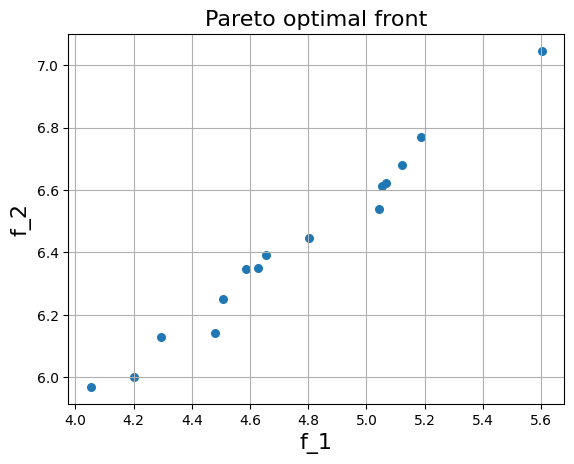

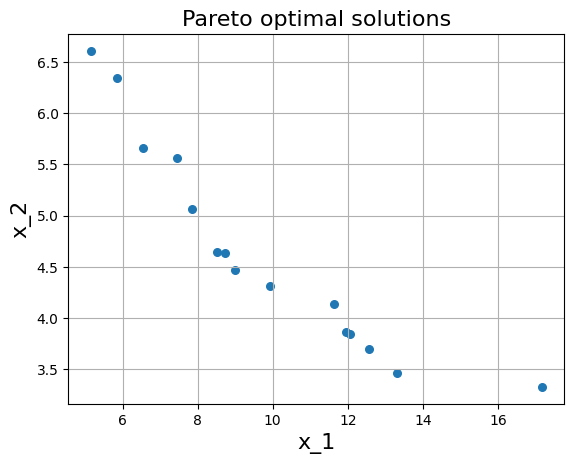

In [ ]:
xR = np.array(xR)
fR = np.array(fR)

# Plot Pareto optimal front
plt.scatter(xR[:,0], xR[:,1], marker='o', s=30)
plt.xlabel('f_1', fontsize=16)
plt.ylabel('f_2', fontsize=16)
plt.title('Pareto optimal front', fontsize=16)
plt.grid(True)
plt.show()

    # Plot Pareto optimal solutions
plt.scatter(fR[:,0], fR[:,1], marker='o', s=30)
plt.xlabel('x_1', fontsize=16)
plt.ylabel('x_2', fontsize=16)
plt.title('Pareto optimal solutions', fontsize=16)
plt.grid(True)
plt.show()


Rocket Interior optimization

In [ ]:
# define the objective functions and constraints
def evalfcn(x):
    x1, x2, x3, x4 = x

    f1 = 0.692 + 0.477*x1 - 0.687*x4 - 0.08*x3 - 0.065*x2 - 0.167*x1**2 \
        - 0.0129*x1*x4 + 0.0796*x4**2 - 0.0634*x1*x3 - 0.0257*x3*x4 + 0.0877*x3**2 \
        - 0.0521*x1*x2 + 0.00156*x2*x4 + 0.00198*x2*x3 + 0.0184*x2**2

    f2 = 0.37 - 0.205*x1 + 0.0307*x4 + 0.108*x3 + 1.019*x2 - 0.135*x1**2 \
        + 0.0141*x1*x4 + 0.0998*x4**2 + 0.208*x1*x3 - 0.0301*x3*x4 - 0.226*x3**2 \
        + 0.353*x1*x2 - 0.0497*x2*x3 - 0.423*x2**2 + 0.202*x2**2 * x4 \
        - 0.281*x2**2 * x3 - 0.342*x1*x2**4 - 0.245*x3**2 * x4 + 0.281*x3**2 * x3 \
        - 0.184*x1*x2**2 + 0.281*x1*x3*x4

    f3 = 0.153 - 0.322*x1 + 0.396*x4 + 0.424*x3 + 0.0226*x2 + 0.175*x1**2 \
        + 0.0185*x1*x4 - 0.0701*x4**2 - 0.251*x1*x3 + 0.179*x3*x4 + 0.015*x3**2 \
        + 0.0134*x1*x2 + 0.0296*x2*x4 + 0.0752*x2*x3 + 0.0192*x2**2

    f4 = 0.758 + 0.358*x1 - 0.807*x4 + 0.0925*x3 - 0.0468*x2 - 0.172*x1**2 \
        + 0.0106*x1*x4 + 0.0697*x4**2 - 0.146*x1*x3 - 0.0416*x3*x4 + 0.102*x3**2 \
        - 0.0694*x1*x2 - 0.00503*x2*x4 + 0.0151*x2*x3 + 0.0173*x2**2
    return np.array([f1, f2, f3, f4])

In [ ]:
def samp(num_points):
    con_x1 = [0, 0.2, 0.4, 0.6]

    candi_Pareto = []
    # randomly generate x1, x2, x3, x4 but x1 is constrained by con_x1
    # generate such 100 points
    for i in range(num_points):
        x1 = random.choice(con_x1)
        x2 = random.uniform(-2, 2)
        x3 = random.uniform(-1, 4)
        x4 = random.uniform(0, 1)
        # print([x1, x2, x3, x4])
        candi_Pareto.append([x1, x2, x3, x4])

    return np.array(candi_Pareto)

In [ ]:
def select_P(xmat):
    J = xmat.shape[0]
    Rset = [0]
    j = 0
    isstep7 = 0
    x = [xmat[0, :]]
    f = [evalfcn(x[0])]

    for k in range(J):
        x.append(xmat[k, :])
        f.append(evalfcn(x[k + 1]))

    while j < J - 1:
        j += 1
        r = 0
        rdel = []
        q = 0
        R = len(Rset)

        while True:
            if all(f[j] < f[Rset[r]]):
                q += 1
                rdel.append(r)
            else:
                if all(f[j] >= f[Rset[r]]):
                    break
            r += 1
            if r > R - 1:
                isstep7 = 1
                break

        if isstep7 == 1:
            isstep7 = 0
            if q != 0:
                Rset = np.delete(Rset, rdel)
                Rset = np.append(Rset, j)
            else:
                Rset = np.append(Rset, j)

    xR = [x[i] for i in Rset]
    fR = [f[i] for i in Rset]

    return xR, fR

In [ ]:
def multi_op(POPSIZE, NUMITER):
    for i in range(1, NUMITER + 1):
        print(f'Iteration {i}...')
        xmat = samp(POPSIZE)
        if i != 1:
            xmat = np.vstack([xmat, np.array(xR)])

        xR, fR = select_P(xmat)
        print(f'Number of Pareto solutions: {len(fR)}')
    # print(xR)
    # print(fR)
    return xR, fR

In [ ]:
xR, fR = multi_op(500, 100)

Iteration 1...
Number of Pareto solutions: 71
Iteration 2...
Number of Pareto solutions: 97
Iteration 3...
Number of Pareto solutions: 126
Iteration 4...
Number of Pareto solutions: 144
Iteration 5...
Number of Pareto solutions: 165
Iteration 6...
Number of Pareto solutions: 181
Iteration 7...
Number of Pareto solutions: 200
Iteration 8...
Number of Pareto solutions: 214
Iteration 9...
Number of Pareto solutions: 232
Iteration 10...
Number of Pareto solutions: 234
Iteration 11...
Number of Pareto solutions: 245
Iteration 12...
Number of Pareto solutions: 261
Iteration 13...
Number of Pareto solutions: 271
Iteration 14...
Number of Pareto solutions: 281
Iteration 15...
Number of Pareto solutions: 288
Iteration 16...
Number of Pareto solutions: 296
Iteration 17...
Number of Pareto solutions: 310
Iteration 18...
Number of Pareto solutions: 320
Iteration 19...
Number of Pareto solutions: 327
Iteration 20...
Number of Pareto solutions: 341
Iteration 21...
Number of Pareto solutions: 351
Ite

In [ ]:
import plotly.graph_objs as go
import plotly.express as px

xR = np.array(xR)
fR = np.array(fR)

fig = go.Figure(data=[go.Scatter3d(x=fR[:,0], y=fR[:,1], z=fR[:,2], mode='markers', marker=dict(size=5))])

# Set axis labels
fig.update_layout(scene=dict(xaxis_title='X Axis', yaxis_title='Y Axis', zaxis_title='Z Axis'))
fig.update_layout(scene=dict(
                    xaxis=dict(range=[-2, 2]),
                    yaxis=dict(range=[-2, 2]),
                    zaxis=dict(range=[-1, 4])
                ))

# Set plot title
fig.update_layout(title_text='3D Scatter Plot (Movable Axes)')


    # Plot Pareto optimal solutions
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(fR[:,0], fR[:,1], fR[:,2], c='blue', marker='o')

# # Set labels
# ax.set_xlabel('X Axis')
# ax.set_ylabel('Y Axis')
# ax.set_zlabel('Z Axis')

# # Set plot title
# ax.set_title('3D Scatter Plot')

# Show the plot
fig.show()

Problem from Pareto 5.8

In [ ]:
def evalfcn(x):
    return np.array([f1(x), f2(x)])

In [ ]:
def f1(x):
    return 2000*x[0] + 500*x[1]

def f2(x):
    return x[0] + 2*x[1]

def g1(x):
    return (16 - 2*x)/2

def g2(x):
    return (28 - x)/5

In [ ]:
x = np.linspace(0, 30, 2*250+100)
lin = 100
x1 = []
y1 = []
for x in x:
    dum = np.empty(lin)
    dum.fill(x)
    # print(dum)

    x1 = np.append(x1, dum)
    y = np.linspace(max(g1(x), g2(x)), 30, lin)

    y1 = np.append(y1, y)
    # lin = lin + 1
# plt.scatter(x1, y1)
feasible_space = np.column_stack((x1, y1))
fk1 = []
fk2 = []
for i in feasible_space:
  fk1 = np.append(fk1, f1(i))
  fk2 = np.append(fk2, f2(i))

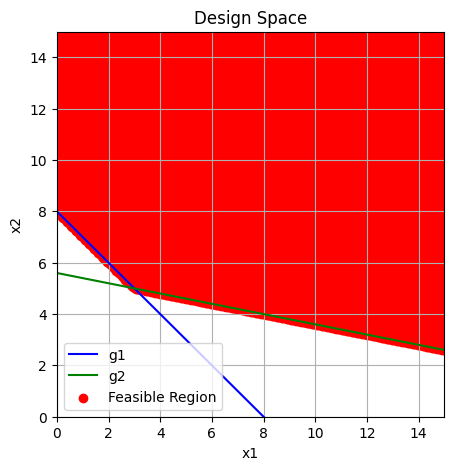

In [ ]:
figure, axes = plt.subplots()
figure.set_figheight(5)
figure.set_figwidth(5)

# plot g_1 and g_2
x = np.linspace(0, 30, 100)
y_1 = g1(x)
y_2 = g2(x)

plt.plot(x, y_1, label='g1', color='b')
plt.plot(x, y_2, label='g2', color='g')

# generate feasible_set
# x = np.linspace(0, 12, 750)
plt.scatter(x1, y1, color='r', label='Feasible Region')


plt.title("Design Space")
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(0, 15)
plt.ylim(0, 15)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def candi_Pareto(feasible_space, num_points):
  num_dim = feasible_space.shape[0]
  idx = np.random.choice(feasible_space.shape[0], num_points)
  candi_points = np.array([feasible_space[idx[0], :]])

  for i in range(0,len(idx)):
    if (i != 0):
      candi_points = np.vstack((candi_points, feasible_space[idx[i], :]))

  return np.array(candi_points)

In [ ]:
def select_P(xmat):
    J = xmat.shape[0]
    Rset = [0]
    j = 0
    isstep7 = 0
    x = [xmat[0, :]]
    f = [evalfcn(x[0])]
    for k in range(J):
        x.append(xmat[k, :])
        f.append(evalfcn(x[k + 1]))

    while j < J - 1:
        j += 1
        r = 0
        rdel = []
        q = 0
        R = len(Rset)


        while True:
            if all(f[j] < f[Rset[r]]):
                q += 1
                rdel.append(r)
            else:
                if all(f[j] >= f[Rset[r]]):
                    break
            r += 1
            if r > R - 1:
                isstep7 = 1
                break

        if isstep7 == 1:
            isstep7 = 0
            if q != 0:
                Rset = np.delete(Rset, rdel)
                Rset = np.append(Rset, j)
            else:
                Rset = np.append(Rset, j)

    xR = [x[i] for i in Rset]
    fR = [f[i] for i in Rset]

    return xR, fR

In [ ]:
def multi_op(POPSIZE, NUMITER):
    for i in range(1, NUMITER + 1):
        print(f'Iteration {i}...')
        xmat = candi_Pareto(feasible_space, POPSIZE)
        if i != 1:
            xmat = np.vstack([xmat, np.array(xR)])

        xR, fR = select_P(xmat)
        print(f'Number of Pareto solutions: {len(fR)}')
    # print(xR)
    # print(fR)
    return xR, fR


In [ ]:
xR, fR = multi_op(5000, 500)

Iteration 1...
Number of Pareto solutions: 10
Iteration 2...
Number of Pareto solutions: 10
Iteration 3...
Number of Pareto solutions: 12
Iteration 4...
Number of Pareto solutions: 14
Iteration 5...
Number of Pareto solutions: 16
Iteration 6...
Number of Pareto solutions: 20
Iteration 7...
Number of Pareto solutions: 25
Iteration 8...
Number of Pareto solutions: 27
Iteration 9...
Number of Pareto solutions: 27
Iteration 10...
Number of Pareto solutions: 29
Iteration 11...
Number of Pareto solutions: 34
Iteration 12...
Number of Pareto solutions: 36
Iteration 13...
Number of Pareto solutions: 39
Iteration 14...
Number of Pareto solutions: 38
Iteration 15...
Number of Pareto solutions: 37
Iteration 16...
Number of Pareto solutions: 38
Iteration 17...
Number of Pareto solutions: 41
Iteration 18...
Number of Pareto solutions: 43
Iteration 19...
Number of Pareto solutions: 43
Iteration 20...
Number of Pareto solutions: 43
Iteration 21...
Number of Pareto solutions: 42
Iteration 22...
Number

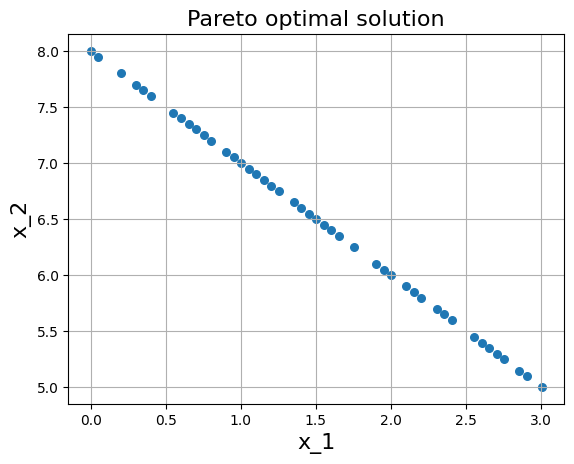

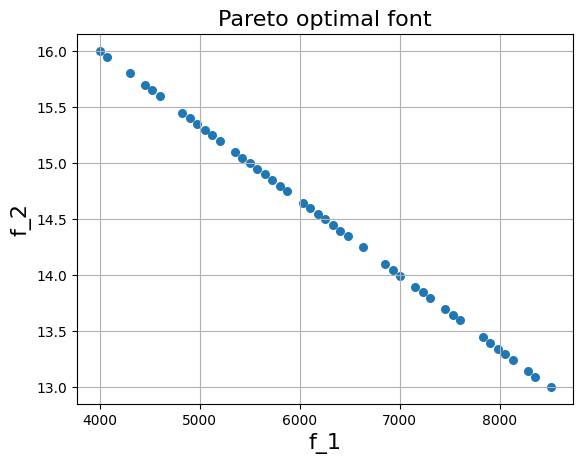

In [ ]:
xR = np.array(xR)
fR = np.array(fR)

# Plot Pareto optimal front
plt.scatter(xR[:,0], xR[:,1], marker='o', s=30)
plt.xlabel('x_1', fontsize=16)
plt.ylabel('x_2', fontsize=16)
plt.title('Pareto optimal solution', fontsize=16)
plt.grid(True)
plt.show()

    # Plot Pareto optimal solutions
plt.scatter(fR[:,0], fR[:,1], marker='o', s=30)
plt.xlabel('f_1', fontsize=16)
plt.ylabel('f_2', fontsize=16)
plt.title('Pareto optimal font', fontsize=16)
plt.grid(True)
plt.show()

In [ ]:
print(xR)

[[2.15358932 5.84641068]
 [1.15191987 6.84808013]
 [0.20033389 7.79966611]
 [2.20367279 5.79632721]
 [2.9048414  5.0951586 ]
 [2.10350584 5.89649416]
 [1.60267112 6.39732888]
 [0.40066778 7.59933222]
 [1.00166945 6.99833055]
 [1.25208681 6.74791319]
 [2.75459098 5.24540902]
 [2.40400668 5.59599332]
 [2.85475793 5.14524207]
 [1.50250417 6.49749583]
 [1.95325543 6.04674457]
 [1.05175292 6.94824708]
 [2.5542571  5.4457429 ]
 [0.30050083 7.69949917]
 [2.70450751 5.29549249]
 [2.35392321 5.64607679]
 [2.0033389  5.9966611 ]
 [0.80133556 7.19866444]
 [1.35225376 6.64774624]
 [1.55258765 6.44741235]
 [0.75125209 7.24874791]
 [2.30383973 5.69616027]
 [0.05008347 7.94991653]
 [1.4524207  6.5475793 ]
 [0.         8.        ]
 [2.65442404 5.34557596]
 [0.70116861 7.29883139]
 [0.65108514 7.34891486]
 [2.60434057 5.39565943]
 [0.95158598 7.04841402]
 [0.35058431 7.64941569]
 [0.60100167 7.39899833]
 [1.75292154 6.24707846]
 [3.00500835 4.99899833]
 [0.5509182  7.4490818 ]
 [1.40233723 6.59766277]


In [ ]:
print(fR)

[[7230.38397329   13.84641068]
 [5727.87979967   14.84808013]
 [4300.50083472   15.79966611]
 [7305.50918197   13.79632721]
 [8357.26210351   13.0951586 ]
 [7155.25876461   13.89649416]
 [6404.0066778    14.39732888]
 [4601.00166945   15.59933222]
 [5502.50417362   14.99833055]
 [5878.13021703   14.74791319]
 [8131.88647746   13.24540902]
 [7606.01001669   13.59599332]
 [8282.13689482   13.14524207]
 [6253.75626043   14.49749583]
 [6929.88313856   14.04674457]
 [5577.6293823    14.94824708]
 [7831.38564274   13.4457429 ]
 [4450.75125209   15.69949917]
 [8056.76126878   13.29549249]
 [7530.88480801   13.64607679]
 [7005.00834725   13.9966611 ]
 [5202.0033389    15.19866444]
 [6028.38063439   14.64774624]
 [6328.88146912   14.44741235]
 [5126.87813022   15.24874791]
 [7455.75959933   13.69616027]
 [4075.12520868   15.94991653]
 [6178.63105175   14.5475793 ]
 [4000.           16.        ]
 [7981.6360601    13.34557596]
 [5051.75292154   15.29883139]
 [4976.62771285   15.34891486]
 [7906.5

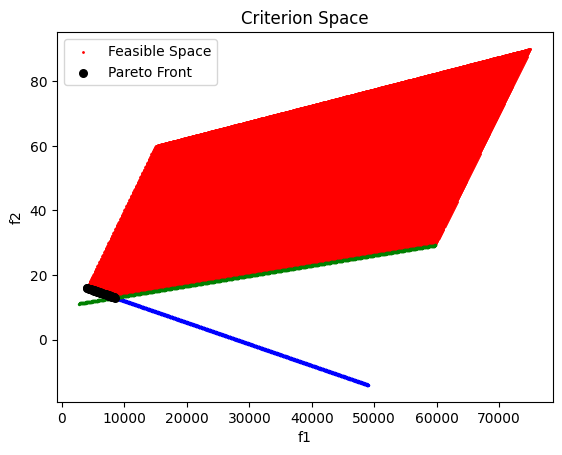

In [ ]:
x = np.linspace(0, 30, 1000)
# x = np.linspace(0, 12, 100)


y_1 = g1(x)
y_2 = g2(x)

plt.scatter(fk1, fk2, s=1, color='r', label='Feasible Space')

# print(x.shape, y_1.shape)
q1 = np.column_stack((x, y_1))
f_1 = np.array([])
f_2 = np.array([])
for i in q1:
  f_1 = np.append(f_1, f1(i))
  # print(f_1)
  f_2 = np.append(f_2, f2(i))
plt.scatter(f_1, f_2, s=2, color='b')


q2 = np.column_stack((x, y_2))
f_1 = np.array([])
f_2 = np.array([])
for i in q2:
  f_1 = np.append(f_1, f1(i))
  f_2 = np.append(f_2, f2(i))
# print(feasible_space[0:1, :])
plt.scatter(f_1, f_2, s=2, color='g')
plt.scatter(fR[:,0], fR[:,1], marker='o', color='k', s=30, label='Pareto Front')
plt.title('Criterion Space')
plt.xlabel('f1')
plt.ylabel('f2')
plt.legend()
# plt.ylim(0, 1000)
# plt.xlim(0, 50000)
# print(f_1(feasible_space))
# print(fR)